In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\USER\Desktop\DSA course\Exit test\train.csv')

In [3]:
df.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.788,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical


# 1. Summary of the dataset
It basically contains track_name, its popularity, certain features, duration in milli seconds, key scale, liveness, loudness, voice gender, mode, speechiness, tempo, category of music , music genere etc. 
It looks to be the data of a __music library/ playlist__, assuming its a data of a major music streaming platform.

In [4]:
df.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre'],
      dtype='object')

In [5]:
df.shape

(15681, 18)

Columns =18, Rows =15681

In [6]:
df.tail()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
15676,MSC_73047.0,I. Andante,0.000,0.866988,0.387476,-1.000,0.196799,0.028725,Scale B,0.248399,-16.331,Female,Major,0.045251,123.516,Band,0.624518,Classical
15677,MSC_34472.0,Only Trust Your Heart,40.514,0.883333,0.459917,378128.464,0.349263,0.000519,Scale F,0.681492,-25.087,Both,Major,0.448377,129.445,Duet,0.609022,Jazz
15678,MSC_32827.0,Moment's Notice,35.082,0.905281,0.566619,581799.061,0.543673,0.209238,Scale D Sharp,0.416611,-10.246,Female,Major,0.040625,123.17,NaN,0.869294,Jazz
15679,MSC_89976.0,Such Small Scenes,59.693,0.113408,0.644554,151226.592,0.912201,0.000089,Scale F,0.166336,-7.257,Both,Minor,0.060308,116.077,Duet,0.402700,Rock
15680,MSC_43297.0,Dogs of War,56.518,0.847136,0.502160,190735.191,0.470057,0.502878,Scale F,0.143114,-11.043,Female,Major,0.029906,94.2,Solo,0.358777,Classical


# 2. Exploratory Data Analysis

In [7]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


 # 2.1 Checking Null Values and performing imputation

In [8]:
df.isnull()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15676,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15677,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
15679,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

Null Values in ['popularity','danceability','duration_ms','energy','instrumentalness,'loudness','voice_gender','mode','speechiness','musician_category', 'valance']

In [10]:
df.dtypes

instance_id           object
track_name            object
popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                   object
liveness             float64
loudness             float64
voice_gender          object
mode                  object
speechiness          float64
tempo                 object
musician_category     object
valence              float64
music_genre           object
dtype: object

Here voice_gender, mode, musician_category are categorical values and null values

In [11]:
df['popularity'].values

array([49.178, 59.827, 89.023, ..., 35.082, 59.693, 56.518])

In [12]:
# Filling null values for voice_gender, musician_category and mode


df['mode'].fillna(df['mode'].mode()[0], inplace=True)
df['musician_category'].fillna(df['musician_category'].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

instance_id            0
track_name             0
popularity           642
acousticness           0
danceability         556
duration_ms           94
energy                94
instrumentalness      95
key                    0
liveness               0
loudness              36
voice_gender         765
mode                   0
speechiness           26
tempo                  0
musician_category      0
valence              677
music_genre            0
dtype: int64

In [14]:
#filling null values for numerical coulmns, we use mean
null_list=['danceability','popularity','duration_ms','energy','instrumentalness','loudness','speechiness','valence']
for column in null_list:
    df[column].fillna(df[column].mean(), inplace=True)



In [15]:
df.isnull().sum()

instance_id            0
track_name             0
popularity             0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
voice_gender         765
mode                   0
speechiness            0
tempo                  0
musician_category      0
valence                0
music_genre            0
dtype: int64

# All Null Values are levelled

# 2.2 Graphs

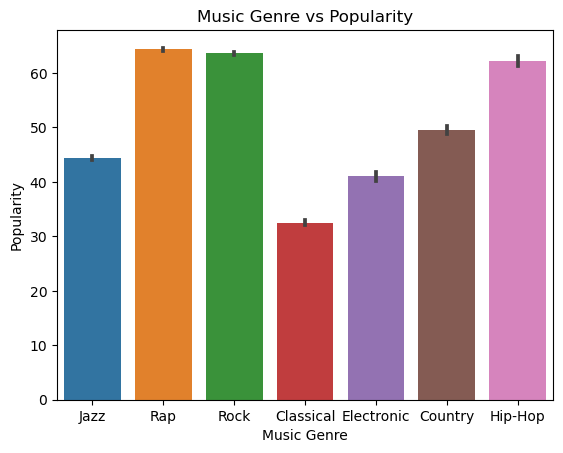

In [16]:

#plt.figure(figsize=(12, 6))
sns.barplot(x='music_genre', y='popularity', data=df)
plt.xlabel('Music Genre')
plt.ylabel('Popularity')
plt.title('Music Genre vs Popularity')
plt.show()


 Most popular ones are Rap, Rock & Hip Hop, Classical music is restricted to a set of listeners hence its value is less

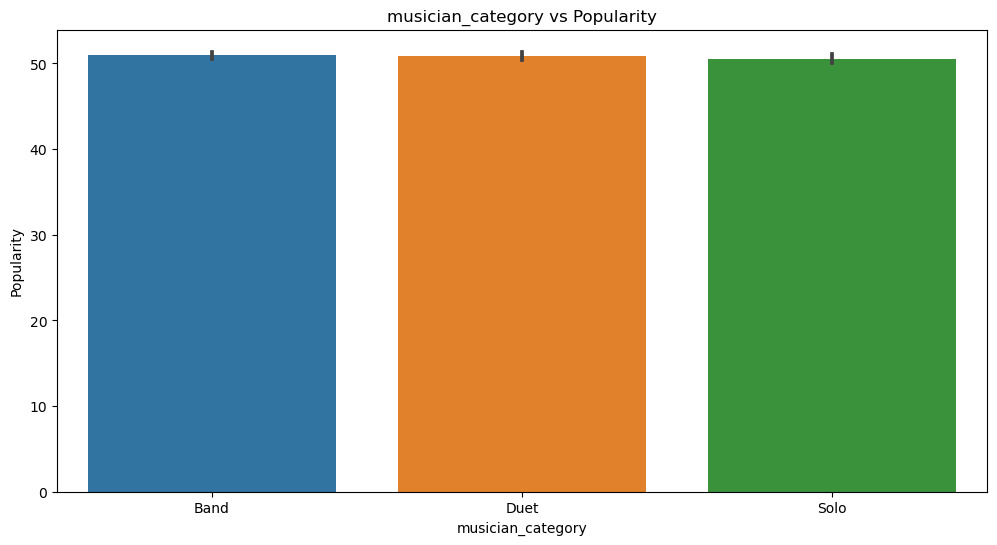

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='musician_category', y='popularity', data=df)
plt.xlabel('musician_category')
plt.ylabel('Popularity')
plt.title('musician_category vs Popularity')
plt.show()


Almost Equal

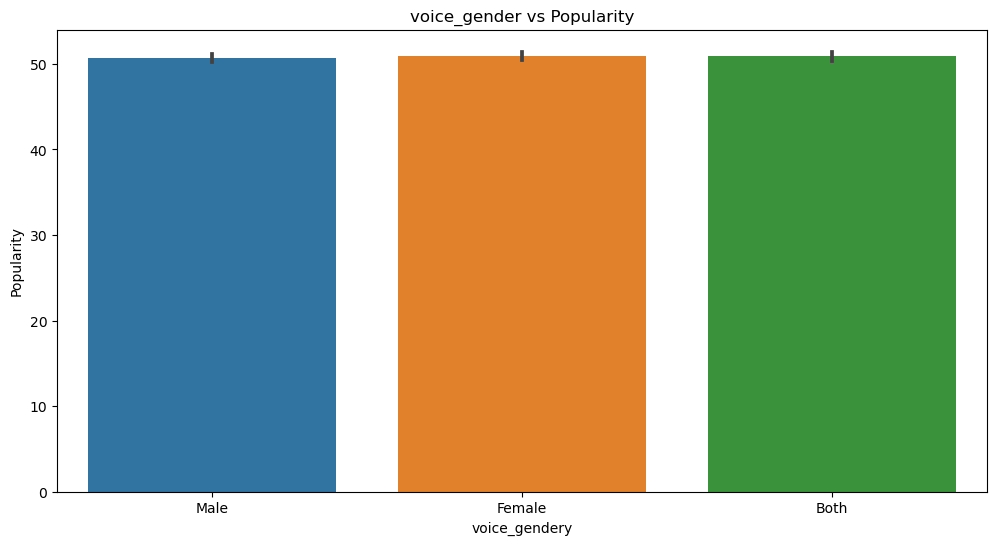

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='voice_gender', y='popularity', data=df)
plt.xlabel('voice_gendery')
plt.ylabel('Popularity')
plt.title('voice_gender vs Popularity')
plt.show()


Almost equal

In [19]:
max_popularity_row = df[df['popularity'] == df['popularity'].max()]
instance_id = max_popularity_row['instance_id'].values[0]
track_name = max_popularity_row['track_name'].values[0]
print(f"Instance ID with Maximum Popularity: {instance_id}")
print(f"Track Name with Maximum Popularity: {track_name}")

Instance ID with Maximum Popularity: MSC_84744.0
Track Name with Maximum Popularity: Wow.


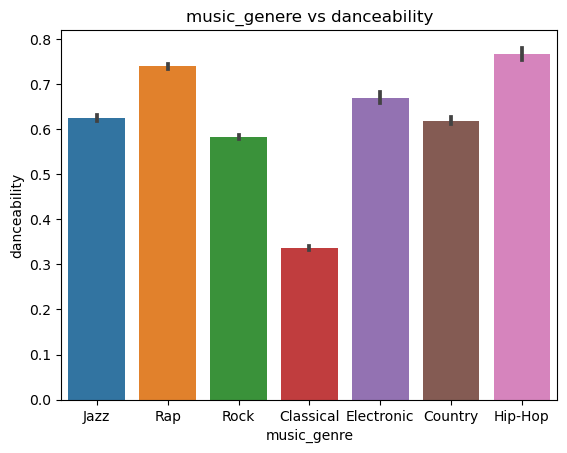

In [20]:

sns.barplot(x='music_genre', y='danceability', data=df)
plt.xlabel('music_genre')
plt.ylabel('danceability')
plt.title('music_genere vs danceability')
plt.show()


Hip hop has the highest danceability, classical has the lowest

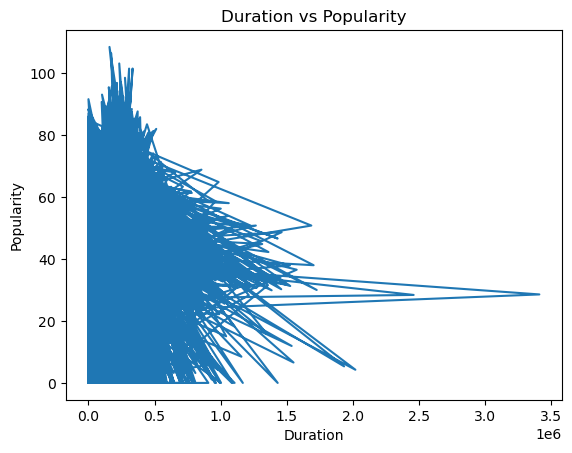

In [21]:

plt.plot(df['duration_ms'], df['popularity'])
plt.title('Duration vs Popularity')
plt.xlabel('Duration')
plt.ylabel('Popularity')
plt.show()

We can judge that popularity is highes for track that takes less time but as per the graph it is non linear and depends on a lot of factors


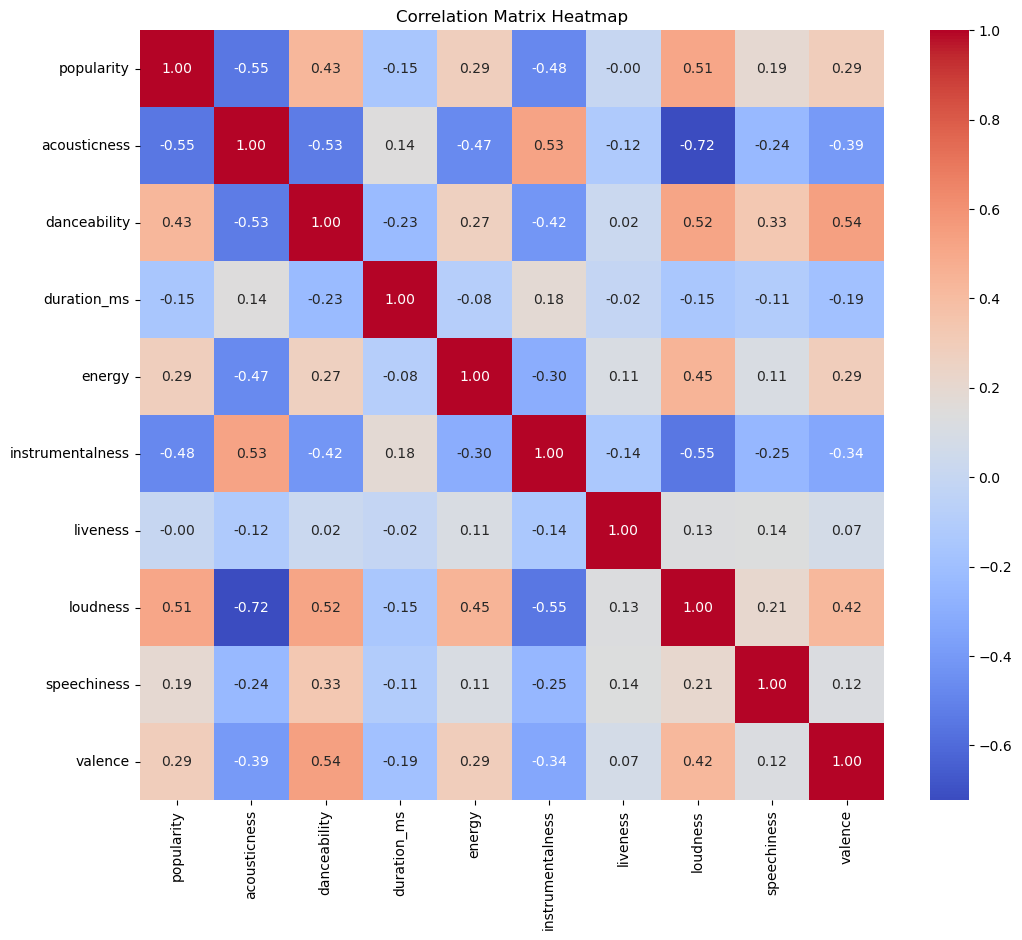

In [22]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# 3. Data Preprocessing

# 3.1 Encoding 

In [23]:
df.dtypes

instance_id           object
track_name            object
popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                   object
liveness             float64
loudness             float64
voice_gender          object
mode                  object
speechiness          float64
tempo                 object
musician_category     object
valence              float64
music_genre           object
dtype: object

In [24]:
cat_cols=['instance_id','track_name','key','voice_gender','mode','tempo','musician_category','music_genre']

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoded_df = df.copy()
label_encoders = {}

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        label_encoded_df[column] = le.fit_transform(df[column])
        label_encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))
        
print("Label Encoded DataFrame:")
print(label_encoded_df)

print("\nMappings of Categorical Values to Label Encoded Values:")
for column, mapping in label_encoders.items():
    print(f"{column}: {mapping}")


Label Encoded DataFrame:
       instance_id  track_name  popularity  acousticness  danceability  \
0            13864        3659      49.178      0.970522      0.580508   
1              452         541      59.827      1.009380      0.687542   
2             9240       14449      89.023      0.020041      0.967948   
3            12348        2023      55.762      0.010284      0.616287   
4            11290       11036      45.095      0.858769      0.280645   
...            ...         ...         ...           ...           ...   
15676        11642        5738       0.000      0.866988      0.387476   
15677         3137        8774      40.514      0.883333      0.459917   
15678         2754        7777      35.082      0.905281      0.566619   
15679        15270       11584      59.693      0.113408      0.644554   
15680         5103        3201      56.518      0.847136      0.502160   

       duration_ms    energy  instrumentalness  key  liveness  loudness  \
0       214

In [26]:
df1=label_encoded_df

In [27]:
df1.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,13864,3659,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,5291,0,0.598965,4
1,452,541,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,0,0.039949,12331,0,0.357194,4
2,9240,14449,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,615,0,0.635525,5
3,12348,2023,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,12331,1,0.983750,6
4,11290,11036,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1466,0,0.074412,0


In [28]:
# Excluding track name
label_encoded_df_columns = df.copy()
label_encoders = {}

# List of columns to label encode
cat_cols = ['instance_id', 'key', 'voice_gender', 'mode', 'tempo', 'musician_category', 'music_genre']

# Loop through each column in the list
for column in cat_cols:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        label_encoded_df_columns[column] = le.fit_transform(df[column])
        label_encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display label encoded DataFrame
print("Label Encoded DataFrame:")
print(label_encoded_df)

# Display mappings of categorical values to label encoded values
print("\nMappings of Categorical Values to Label Encoded Values:")
for column, mapping in label_encoders.items():
    print(f"{column}: {mapping}")

Label Encoded DataFrame:
       instance_id  track_name  popularity  acousticness  danceability  \
0            13864        3659      49.178      0.970522      0.580508   
1              452         541      59.827      1.009380      0.687542   
2             9240       14449      89.023      0.020041      0.967948   
3            12348        2023      55.762      0.010284      0.616287   
4            11290       11036      45.095      0.858769      0.280645   
...            ...         ...         ...           ...           ...   
15676        11642        5738       0.000      0.866988      0.387476   
15677         3137        8774      40.514      0.883333      0.459917   
15678         2754        7777      35.082      0.905281      0.566619   
15679        15270       11584      59.693      0.113408      0.644554   
15680         5103        3201      56.518      0.847136      0.502160   

       duration_ms    energy  instrumentalness  key  liveness  loudness  \
0       214

# The above two cells 25 & 28 maps label encoded values to categorical values

In [29]:
label_encoded_df_columns.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,13864,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,5291,0,0.598965,4
1,452,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,0,0.039949,12331,0,0.357194,4
2,9240,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,615,0,0.635525,5
3,12348,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,12331,1,0.983750,6
4,11290,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1466,0,0.074412,0


In [30]:
df2=label_encoded_df_columns.copy()

In [31]:
df2.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,13864,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,5291,0,0.598965,4
1,452,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,0,0.039949,12331,0,0.357194,4
2,9240,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,615,0,0.635525,5
3,12348,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,12331,1,0.983750,6
4,11290,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1466,0,0.074412,0


In [32]:
# we save df1 and df2 AS SEPERATE DATAFRAME TO AVOID FURTHER ERRORS

# 4. Applying ML Algos

__PROBLEM STATEMENT__ : Predict Popularity of the track based on the above features

In [33]:
# Feature reduction

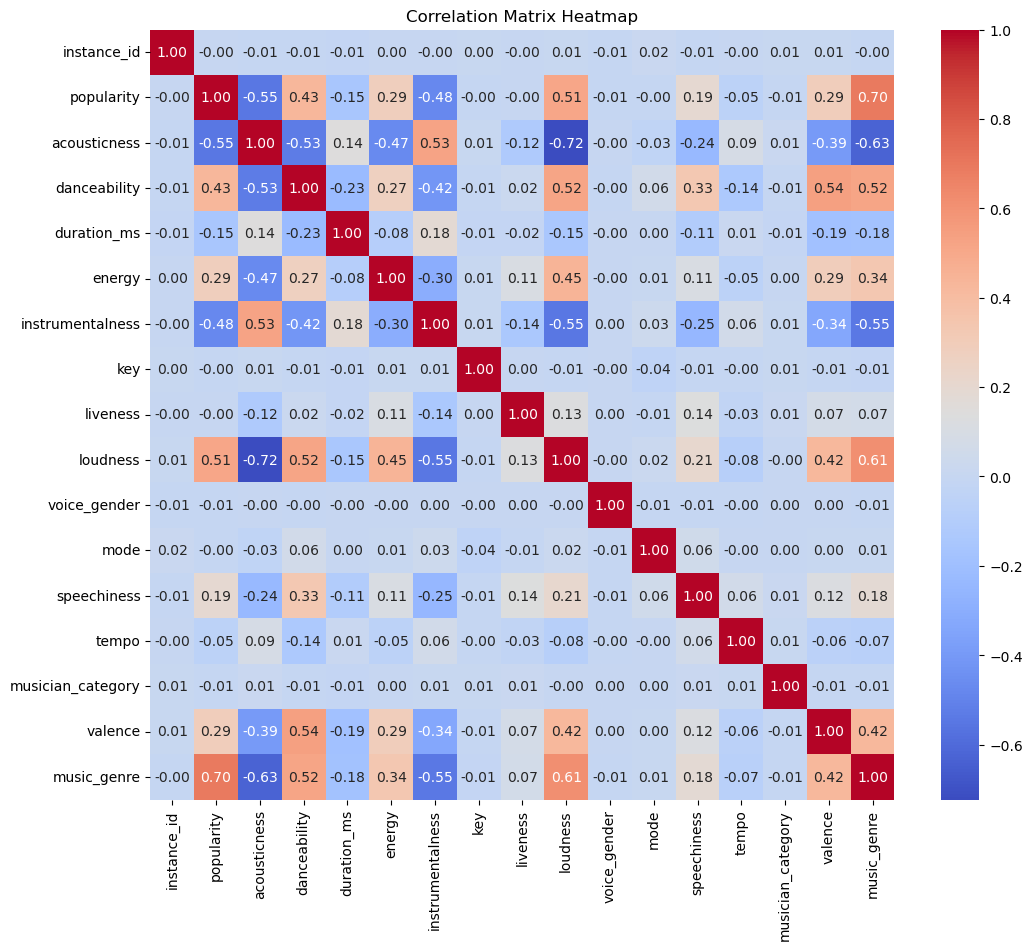

In [34]:
corr_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

 Since almost all the columns does not have correlation >0.55 we are not removing any columns

In [35]:
df2.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,13864,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,5291,0,0.598965,4
1,452,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,0,0.039949,12331,0,0.357194,4
2,9240,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,615,0,0.635525,5
3,12348,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,12331,1,0.983750,6
4,11290,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1466,0,0.074412,0


In [54]:
df2=df2.drop('track_name',axis=1)

In [53]:
df2=df2.drop('instance_id',axis=1)

Removed neutral features

In [55]:
df2.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender',
       'mode', 'speechiness', 'tempo', 'musician_category', 'valence',
       'music_genre'],
      dtype='object')

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
X = df2.drop('popularity', axis=1)  
y = df2['popularity'] 


In [57]:
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,5291,0,0.598965,4
1,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,0,0.039949,12331,0,0.357194,4
2,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,615,0,0.635525,5
3,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,12331,1,0.983750,6
4,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1466,0,0.074412,0


In [58]:
y.head()

0    49.178
1    59.827
2    89.023
3    55.762
4    45.095
Name: popularity, dtype: float64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
df2.dtypes

popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                    int32
liveness             float64
loudness             float64
voice_gender           int32
mode                   int32
speechiness          float64
tempo                  int32
musician_category      int32
valence              float64
music_genre            int32
dtype: object

# 4.1 Linear Regression

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [62]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 140.7341263862095
R-squared (R2): 0.5092206432095756


# 4.2 KNN

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
k = 5
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [65]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 302.4891111568329
R-squared (R2): -0.05486434045328137


In [66]:
# much better Values

# 4.3 Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
random_forest_model = RandomForestRegressor(random_state=42)  
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

In [69]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 108.54069038190448
R-squared (R2): 0.6214881807342534


# Moving forward with Random Forest

SVM Took long time to respond and the notebook hanged, hence skipping it, most of the cases RF=DT hence skipping that too

# 4.4 Hyperparameter Tuning

Randomnized search

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define hyperparameter grid
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Adjust the range as needed
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Adjust the range as needed
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=2, cv=5, n_jobs=-1, random_state=42
)

# Fit the randomized model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_rf = random_search.best_estimator_


Best Parameters: {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 70, 'bootstrap': False}


In [85]:
best_params = {
    'n_estimators': 20,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_depth': 70,
    'bootstrap': False
}

# Create the Random Forest Regressor with the best parameters
best_rf_regressor = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_depth=best_params['max_depth'],
    bootstrap=best_params['bootstrap'],
    random_state=42 
)



In [86]:
# Fit the model to your training data
best_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=70, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=20, random_state=42)

In [88]:
y_pred = best_rf_regressor.predict(X_test)

In [89]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 195.46442229562086
R-squared (R2): 0.31836075646356643


# RESULT


# Succesfully formulated a model to find the _popularity_ of a _track_ based on its features